<a href="https://colab.research.google.com/github/ishasolanki04/github/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing necessary libraries for the project

In [ ]:
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.4 MB/s eta 0:00:00


In [ ]:
import ydata_profiling as pp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 read dataset into a variable

In [ ]:
 df = pd.read_csv('/content/drive/MyDrive/breastcancer.csv')

In [ ]:
df.head()

,Age,Marital Status,Unnamed: 2,T Stage,6th Stage,N Stage,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,42,Married,NaN,T2,IIIC,N3,Regional,63,Positive,Positive,18,11,25,Alive
1,53,Married,NaN,T2,IIIA,N2,Distant,45,Positive,Positive,25,9,9,Alive
2,33,Married,NaN,T2,IIB,N1,Regional,25,Positive,Positive,4,1,6,Dead
3,45,Separated,NaN,T2,IIA,N1,Regional,19,Positive,Positive,23,1,45,Dead
4,49,Married,NaN,T2,IIIA,N2,Regional,35,Positive,Negative,22,5,71,Dead


In [ ]:
df.columns

Index(['Age', 'Marital Status', 'Unnamed: 2', 'T Stage ', '6th Stage',
       'N Stage', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Drop the column with no data and view the newly formed table


In [ ]:
df.drop(['Unnamed: 2'], axis = 'columns', inplace = True)
df.head()

,Age,Marital Status,T Stage,6th Stage,N Stage,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,42,Married,T2,IIIC,N3,Regional,63,Positive,Positive,18,11,25,Alive
1,53,Married,T2,IIIA,N2,Distant,45,Positive,Positive,25,9,9,Alive
2,33,Married,T2,IIB,N1,Regional,25,Positive,Positive,4,1,6,Dead
3,45,Separated,T2,IIA,N1,Regional,19,Positive,Positive,23,1,45,Dead
4,49,Married,T2,IIIA,N2,Regional,35,Positive,Negative,22,5,71,Dead


The tuple below allows to see the number of rows and columns ion the datset

In [ ]:
df.shape

(4024, 13)

df.info() is used to find the no of non null values , the data type and memopry usage .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Marital Status          4024 non-null   object
 2   T Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   A Stage                 4024 non-null   object
 6   Tumor Size              4024 non-null   int64 
 7   Estrogen Status         4024 non-null   object
 8   Progesterone Status     4024 non-null   object
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
 12  Status                  4024 non-null   object
dtypes: int64(5), object(8)
memory usage: 408.8+ KB


The below command requires you to feed a  DataFrame to it, and it takes care of basic EDA

In [ ]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This table basically tells how every column correlate with each other. Closer the number is to 1, the more they mirror each other.



In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077968,-0.013355,0.010985,-0.013568
Tumor Size,-0.077968,1.000000,0.063607,0.242042,-0.020724
Regional Node Examined,-0.013355,0.063607,1.000000,0.252952,-0.015170
Reginol Node Positive,0.010985,0.242042,0.252952,1.000000,-0.041430
Survival Months,-0.013568,-0.020724,-0.015170,-0.041430,1.000000


In [ ]:
#Encode categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)


array([0, 0, 0, ..., 1, 0, 1])

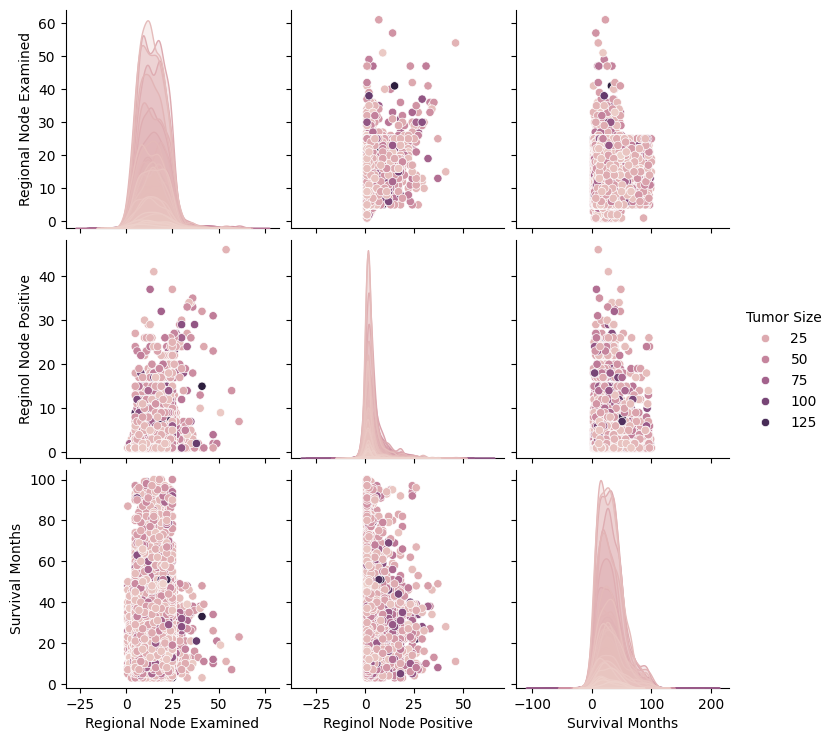

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:14], hue ='Tumor Size')

<ipython-input-33-4562c2b12ab1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,1:12].corr())


<Axes: >

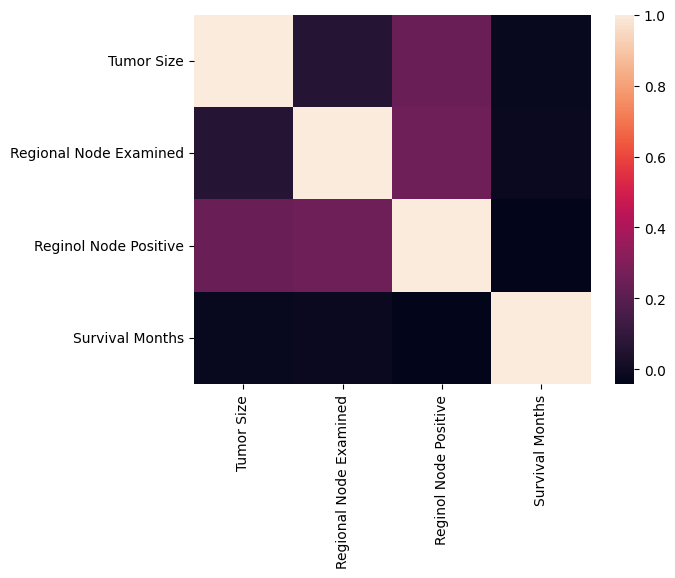

In [ ]:
#Visualize the correlation
sns.heatmap(df.iloc[:,1:12].corr())

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Using KNN for basic regression and classification tasks

In [ ]:

data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#using knn

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

To evaluate the accuracy of the knn model

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9473684210526315


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


Using svm since it works well with both linearly separable and non-linearly separable data

In [ ]:
#using svm {rbf parameter}
svm = SVC(kernel='rbf', random_state=42)


svm.fit(X_train_scaled, y_train)

# Predict
y_pred = svm.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9824561403508771


In [ ]:
#using svm{using linear model}
svm = SVC(kernel='linear', random_state=42)


svm.fit(X_train_scaled, y_train)

# Predict
y_pred = svm.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Using XGBoost

In [ ]:
#using xgb
xgb = XGBClassifier()


xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [ ]:
#modified code with cross validation


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Cross-Validation Accuracy: 0.9626373626373625


In [ ]:
#using rf
rf = RandomForestClassifier()

cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Calculate accuracy on test set
accuracy = sum(cv_scores) / len(cv_scores)
print("Cross-Validation Accuracy:", accuracy)

In [ ]:
#calculate accuracy using the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Accuracy on Test Set: 0.9649122807017544


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)


mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9385964912280702
